NGÀY 1:

CHỦ ĐỀ: XỬ LÝ DỮ LIỆU ĐẦU VÀO LÀ CẢM BIẾN NHIỆT ĐỘ (Temperature Sensor).

TƯ DUY TỔNG QUÁT: Tôi đang đo cái gì? Đo để làm gì? và quyết định được gì khi dựa trên số liệu đó?.

Mục tiêu: 

    - Hiểu dữ liệu cảm biến là gì?.

    - Biết python xử lý dữ liệu sensor như thế nào?.

    - Dùng được: Biến, hàm, list, vòng lặp.

    - Vẽ được biểu đồ nhiệt độ theo thời gian, có lập ngưỡng overhead.

 Định nghĩa bài toán:

 Một motor trong nhà máy SMT có sensor nhiệt độ như sau:

    - Đo mỗi 10 giây, lấy tổng cộng 100 mẫu dữ liệu.

    - Nhiệt độ bình thường được xác định trong khoảng: 40-70 độ C.

    - Thiết lập ngưỡng cảnh báo quá nhiệt là 65 độ.

 Nhiệm vụ:

    - Cell 0: Import thư viện liên quan.

    - Cell 1: Tạo dữ liệu nhiệt độ, data type, làm tròn số.

    - Cell 2: Tạo timestamp(Tần xuất lấy mẫu).

    - Cell 3: Lưu và in thông tin dữ liệu.

    - Cell 5: Phân tích dữ liệu cảm biến.

    - Cell 6: Biểu diễn biểu đồ.


In [9]:
import random
from decimal import Decimal,ROUND_HALF_UP
import matplotlib.pyplot as plt

In [10]:
temperature_data = []

for sample in range(100):
    temp = Decimal(str(random.uniform(40,70))).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)
    temperature_data.append(temp)  #sensor gửi dữ liệu
temperature_data[:3]

[Decimal('65.25'), Decimal('63.08'), Decimal('48.91')]

In [11]:
from datetime import datetime, timedelta

timestamped_data = []
start_time = datetime.now() # Thời điểm bắt đầu đo
interval = timedelta(seconds=10)  # 6 giây lấy mẫu một lần

for i, temp in enumerate(temperature_data):
    record = {
        'timestamp': start_time + i * interval,
        'temperature': temp
    }
    timestamped_data.append(record)

timestamped_data[:3]

[{'timestamp': datetime.datetime(2025, 12, 23, 20, 18, 1, 39455),
  'temperature': Decimal('65.25')},
 {'timestamp': datetime.datetime(2025, 12, 23, 20, 18, 11, 39455),
  'temperature': Decimal('63.08')},
 {'timestamp': datetime.datetime(2025, 12, 23, 20, 18, 21, 39455),
  'temperature': Decimal('48.91')}]

In [12]:
max_temp = max(temperature_data)
min_temp = min(temperature_data)
avg_temp = sum(temperature_data) / len(temperature_data)

print(f"Max Temp: {max_temp.quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)} °C")
print(f"Min Temp: {min_temp.quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)} °C")
print(f"Average Temp: {avg_temp.quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)} °C")

Max Temp: 69.79 °C
Min Temp: 40.06 °C
Average Temp: 55.61 °C


In [13]:
def analyze_temperature(data):
    if not data:
        return None
    
    max_temp = max(data)
    min_temp = min(data)
    avg_temp = sum(data) / Decimal(len(data))
    
    return{
        "max": max_temp.quantize(Decimal('0.01'), rounding=ROUND_HALF_UP),
        "min": min_temp.quantize(Decimal('0.01'), rounding=ROUND_HALF_UP),
        "avg": avg_temp.quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)
    }
result = analyze_temperature(temperature_data)
result

{'max': Decimal('69.79'), 'min': Decimal('40.06'), 'avg': Decimal('55.61')}

In [14]:
times = [d["timestamp"] for d in timestamped_data]
temps = [float(d["temperature"]) for d in timestamped_data]

In [15]:
OVERHEAT_THRESHOLD = Decimal('65.00')

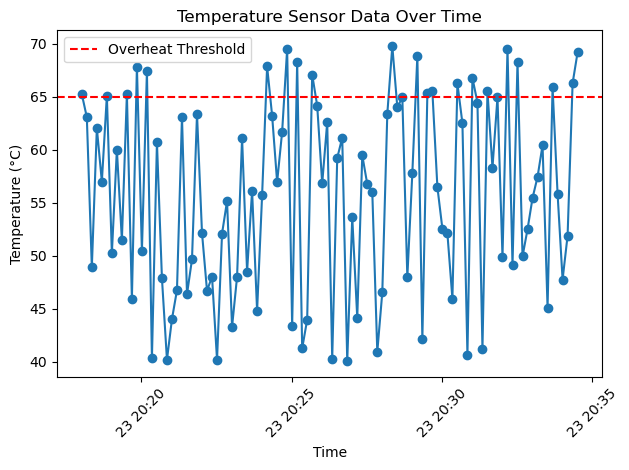

In [16]:
plt.figure()
plt.plot(times, temps, marker='o')
plt.axhline(y=float(OVERHEAT_THRESHOLD), color='r', linestyle='--', label='Overheat Threshold')
plt.legend()

plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Sensor Data Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()